# Data PreProcessing and Model building

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

pd.set_option('display.max_columns', None)

df = pd.read_csv('lending_club_loan_two.csv')

In [2]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


<b> Check and handle missing values 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [5]:
df.isnull().sum() * 100 / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [6]:
print(data_info.loc['emp_title']['Description'])

The job title supplied by the Borrower when applying for the loan.*


In [7]:
print(data_info.loc['emp_length']['Description'])

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [8]:
df['emp_title'].nunique()

173105

In [9]:
df['emp_title'].value_counts()

Teacher                               4389
Manager                               4250
Registered Nurse                      1856
RN                                    1846
Supervisor                            1830
                                      ... 
consol energy                            1
ny state department of corrections       1
IT Tech 2                                1
Randomization Specialist                 1
Manager of Capital Projects              1
Name: emp_title, Length: 173105, dtype: int64

<b> Since,there are too many unique values in emp_title it would not to possible to convert it into dummy variables.Therefore remove emp_title

In [10]:
df = df.drop('emp_title',axis=1)

In [11]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<b> See if emp_length has strong relationship with people being charged off.

In [12]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [13]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [14]:
emp_len = emp_co/emp_fp

In [15]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

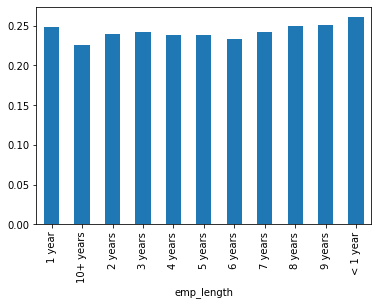

In [16]:
emp_len.plot(kind='bar')

<b> Charge off rates are extremely similar across all employment lengths.So, We can drop them.

In [17]:
df = df.drop('emp_length',axis=1)

In [18]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [19]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [20]:
# We can drop the title column since it is a string subcategory/description of the purpose column

df = df.drop('title',axis=1)

In [21]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [22]:
print(data_info.loc['mort_acc']['Description'])

Number of mortgage accounts.


In [23]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [24]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [25]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

<b> Fill in missing mort_acc based on total_acc value.

In [26]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [27]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [28]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [29]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [30]:
df = df.dropna()

In [31]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [33]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [34]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

<b> grade is part of sub-grade so we can drop it.

In [36]:
df = df.drop('grade',axis=1)

In [40]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

# one hot encode subgrade.

In [41]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [42]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

# one hot encode above three columns mentioned

In [43]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [44]:
# Since we have less number of None and any convert it into Other to have less features.

df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [45]:
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

<b> feature engineer zipcode from address.

In [46]:
df['zipcode'] = df['address'].apply(lambda address:address[-5:])

In [48]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [50]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df = df.drop(['zipcode','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

<b> drop issue_id.Since,we won't know if load would be granted or not.

In [51]:
df = df.drop('issue_d',axis=1)

In [52]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [53]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x:int(x[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [55]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

<b> Now we can divide the data in train and test set and train our model.

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [59]:
df = df.drop('loan_status',axis=1)

In [60]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [61]:
print(len(df))

395219


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)

In [66]:
X_test = scaler.transform(X_test)

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [69]:
X_train.shape

(316175, 78)

In [70]:
model = Sequential()

model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [71]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 8s 4ms/step - loss: 0.2992 - val_loss: 0.2636
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2646 - val_loss: 0.2612
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2607 - val_loss: 0.2599
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2589 - val_loss: 0.2594
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2580 - val_loss: 0.2590
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2574 - val_loss: 0.2591
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2567 - val_loss: 0.2583
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2563 - val_loss: 0.2587
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2560 - val_loss: 0.2580
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.255

In [72]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

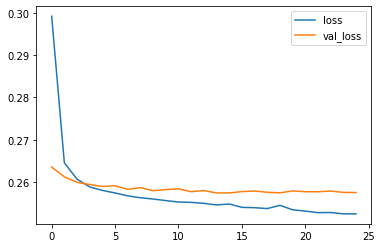

In [76]:
losses.plot()

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [82]:
confusion_matrix(y_test,predictions)

array([[ 7048,  8610],
       [  215, 63171]], dtype=int64)

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
random_forest = RandomForestClassifier(n_estimators=100)

In [85]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
y_pred = random_forest.predict(X_test)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044

